<a href="https://colab.research.google.com/github/shaizad786/MYPROJECTS/blob/main/TWITTER_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DOWNLOADING NECESSARY NLP TOOLKIT

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

#IMPORTING LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from imblearn.over_sampling import SMOTE

#IMPORTING ML MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 


import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#LOADING DATASET

In [ ]:
df=pd.read_csv('/content/train.csv')
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


#DROPPING UNCESSARY COLUMNS

In [ ]:
df.drop(['id'],inplace=True,axis=1)

#DROPING DUPLICATES VALUE

In [ ]:
df.drop_duplicates(keep="first")

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31956,0,off fishing tomorrow @user carnt wait first ti...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...


#DATA AUGUMENTATION USING NLPAUG

Text(0, 0.5, 'Count')

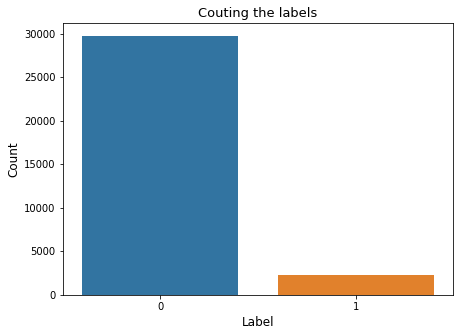

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Couting the labels', fontsize=13)
sns.countplot(data=df, x='label')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

In [ ]:
!pip install nlpaug
!pip install textaugment
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 8.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.4 MB 19.1 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 53 kB 2.5 MB/s 
     |████████████████████████████████| 65 kB 4.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=26bf9723b031e2ab9acbb4f56bb0ce52288b15b01c2a0de83429756a641c1441
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 8.2 MB/s 
     |███

In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

data_df=df.copy()

aug_texts = []
minority_data = data_df[data_df['label'] == 1]
aug = naw.SynonymAug(aug_src='wordnet')

texts = minority_data['tweet'].tolist()

for text in texts:
    augmented_texts = aug.augment(text, n=12)
    
    for augmented in augmented_texts:
        aug_texts.append(augmented)

print(len(aug_texts))

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


26904


In [ ]:
temp = pd.DataFrame({
    'tweet': aug_texts
})

temp['label']=1

In [ ]:
data_resampled_nlpaug = pd.concat([data_df, temp], axis=0)
data_resampled_nlpaug = data_resampled_nlpaug.reset_index()
data_resampled_nlpaug = data_resampled_nlpaug.drop(columns=['index'])
del temp, minority_data

Text(0, 0.5, 'Count')

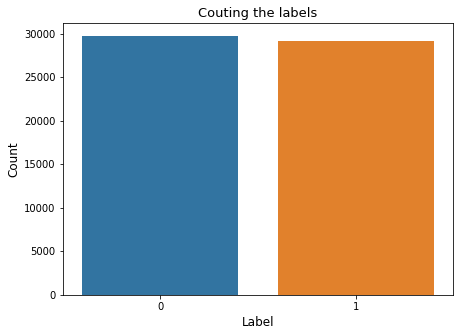

In [ ]:
plt.figure(figsize=(7, 5))
plt.title('Couting the labels', fontsize=13)
sns.countplot(data=data_resampled_nlpaug, x='label')
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

#CLEANING TWEET BY MAKING NEW COLUMN

In [ ]:
from html.parser import HTMLParser
html_parser=HTMLParser()

df['clean_tweet']=df['tweet'].apply(lambda x:html_parser.unescape(x))
df.head(10)

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...,@user camping tomorrow @user @user @user @use...
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...,@user @user welcome here ! i'm it's so #gr...


#REMOVING @USER FROM ALL TWEETS

In [ ]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i, '', input_txt)
    return input_txt

df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")
df['clean_tweet'][:3]

0      when a father is dysfunctional and is so sel...
1      thanks for #lyft credit i can't use cause th...
2                                  bihday your majesty
Name: clean_tweet, dtype: object

In [ ]:
df

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu?ððððððð...
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised in in #calgary, #wso..."


#CONVERTING ALL THE TWEETS INTO LOWERCASE

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.lower())
df.head(10)



,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide: society now #motivation
5,0,[2/2] huge fan fare and big talking before the...,[2/2] huge fan fare and big talking before the...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow dannyâ¦
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams.ð...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won!!! love the land!!! #allin #cavs #champ...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here ! i'm it's so #gr8 !


#REMOVING PUNCTUATIONS

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: re.sub(r'[^\w\s]',' ',x))

\#REMOVING INTEGERS WITH SPACE

In [ ]:
df['clean_tweet']=df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))

#REPLACING SPEACIAL CHARACTERS WITH SPACE

In [ ]:
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]',' ',x))

In [ ]:
df

,label,tweet,clean_tweet
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,0,bihday your majesty,bihday your majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,0,factsguide: society now #motivation,factsguide society now motivation
...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso...


#SPELLING CORRECTION USING TEXTBLOB LIBRARY

In [ ]:
from textblob import TextBlob
text=df['clean_tweet'][0:10].apply(lambda x: str(TextBlob(x).correct()))
text

0      when a father is dysfunctional and is so sel...
1      thanks for  left credit i can t use cause th...
2                                  midday your majesty
3     model   i love u take with u all the time in ...
4               factsguide  society now     motivation
5          huge fan fare and big talking before the...
6                     camping tomorrow        dandy   
7    the next school year is the year for exam     ...
8    we won    love the land     allen  caps  champ...
9                welcome here    i m   it s so  gr    
Name: clean_tweet, dtype: object

#TOKENIZATIONS

In [ ]:
df['tokens']=df['clean_tweet'].apply(lambda x:word_tokenize(x))

In [ ]:
df

,label,tweet,clean_tweet,tokens
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...,"[thanks, for, lyft, credit, i, can, t, use, ca..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]"
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t..."
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]"
...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...,"[ate, isz, that, youuu]"
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwaves, try..."
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso...,"[sikh, temple, vandalised, in, in, calgary, ws..."


#REMOVING STOPWORDS









In [ ]:
stopwords=stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['removed_stopword']=df['tokens'].apply(lambda x: [word for word in x if not word in stopwords])

In [ ]:
df

,label,tweet,clean_tweet,tokens,removed_stopword
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ..."
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...,"[thanks, for, lyft, credit, i, can, t, use, ca...","[thanks, lyft, credit, use, cause, offer, whee..."
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]"
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur]"
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]"
...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...,"[ate, isz, that, youuu]","[ate, isz, youuu]"
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, trying, wrap, ma..."
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor...","[listening, sad, songs, monday, morning, otw, ..."
31960,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso...,"[sikh, temple, vandalised, in, in, calgary, ws...","[sikh, temple, vandalised, calgary, wso, conde..."


#USING STEMMING TECHNIQUES


In [ ]:
stem=PorterStemmer()
df['stem']=df['removed_stopword'].apply(lambda x:' '.join([stem.stem(i) for i in x]))

In [ ]:
df['stem']

0            father dysfunct selfish drag kid dysfunct run
1        thank lyft credit use caus offer wheelchair va...
2                                           bihday majesti
3                              model love u take u time ur
4                                  factsguid societi motiv
                               ...                        
31957                                        ate isz youuu
31958    see nina turner airwav tri wrap mantl genuin h...
31959             listen sad song monday morn otw work sad
31960          sikh templ vandalis calgari wso condemn act
31961                                         thank follow
Name: stem, Length: 31962, dtype: object

#CONVERTING WORDS INTO ITS BASE FORM USING LEMMITIZATION

In [ ]:
lemma=WordNetLemmatizer()

df['lemmatized']=df['removed_stopword'].apply(lambda x:' '.join([lemma.lemmatize(i) for i in x]))

In [ ]:
df.head(10)

,label,tweet,clean_tweet,tokens,removed_stopword,stem,lemmatized
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...,"[thanks, for, lyft, credit, i, can, t, use, ca...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur]",model love u take u time ur,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
5,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...,"[huge, fan, fare, and, big, talking, before, t...","[huge, fan, fare, big, talking, leave, chaos, ...",huge fan fare big talk leav chao pay disput ge...,huge fan fare big talking leave chaos pay disp...
6,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,"[camping, tomorrow, danny]","[camping, tomorrow, danny]",camp tomorrow danni,camping tomorrow danny
7,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...,"[the, next, school, year, is, the, year, for, ...","[next, school, year, year, exams, think, schoo...",next school year year exam think school exam h...,next school year year exam think school exam h...
8,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...,"[we, won, love, the, land, allin, cavs, champi...","[love, land, allin, cavs, champions, cleveland...",love land allin cav champion cleveland clevela...,love land allin cavs champion cleveland clevel...
9,0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so gr,"[welcome, here, i, m, it, s, so, gr]","[welcome, gr]",welcom gr,welcome gr


#VISUALIZING THE DATA USING LIBRARY CALLED WORDCLOUD 

In [ ]:
positive_tweets=' '.join(df[df['label']==0]['clean_tweet'])
negative_tweets=' '.join(df[df['label']==1]['clean_tweet'])


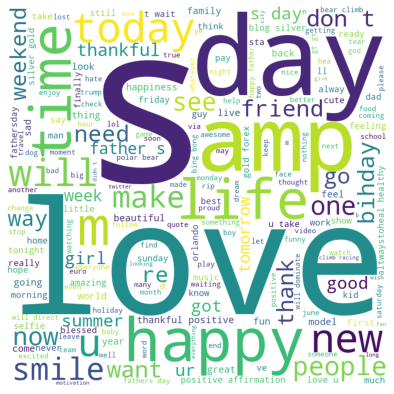

In [ ]:
wc=WordCloud(width=800,height=800,
             background_color='white',
             min_font_size=10)
wc.generate(positive_tweets)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

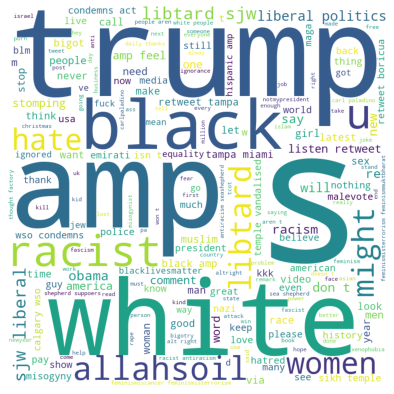

In [ ]:
wc=WordCloud(width=800,height=800,
             background_color='white',
             min_font_size=10)
wc.generate(negative_tweets)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

#REMOVING EMOJIS

In [ ]:
!pip install emoji
import emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 8.0 MB/s 
  Created wheel for emoji: filename=emoji-2.1.0-py3-none-any.whl size=212392 sha256=d41fe4f8e46ad8c3fd87a0cc8f2261aef7c91dfc9519b7cd44e434a23191d3ef
  Stored in directory: /root/.cache/pip/wheels/77/75/99/51c2a119f4cfd3af7b49cc57e4f737bed7e40b348a85d82804
Successfully built emoji


In [ ]:
def deEmojify1(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
def deEmojify2(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

#CLEANING RAW DATA SUCH AS LINKS AND MARKUPS

In [ ]:
def clean(raw):
    tweet=re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    tweet= re.sub('&gt;', "", tweet) 
    tweet= re.sub('&#x27;', "'", tweet)
    tweet= re.sub('&#x2F;', ' ', tweet)
    tweet=re.sub('<p>', ' ', tweet)
    tweet=re.sub('<i>', ' ', tweet)
    tweet=re.sub('</i>', '', tweet) 
    tweet=re.sub('&#62;', '', tweet)
    tweet=re.sub("\n", '', tweet)
    return tweet

df['clean_tweet']=df['clean_tweet'].apply(clean)

In [ ]:
df

,label,tweet,clean_tweet,tokens,removed_stopword,stem,lemmatized
0,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...,"[when, a, father, is, dysfunctional, and, is, ...","[father, dysfunctional, selfish, drags, kids, ...",father dysfunct selfish drag kid dysfunct run,father dysfunctional selfish drag kid dysfunct...
1,0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...,"[thanks, for, lyft, credit, i, can, t, use, ca...","[thanks, lyft, credit, use, cause, offer, whee...",thank lyft credit use caus offer wheelchair va...,thanks lyft credit use cause offer wheelchair ...
2,0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]",bihday majesti,bihday majesty
3,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,"[model, i, love, u, take, with, u, all, the, t...","[model, love, u, take, u, time, ur]",model love u take u time ur,model love u take u time ur
4,0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]",factsguid societi motiv,factsguide society motivation
...,...,...,...,...,...,...,...
31957,0,ate @user isz that youuu?ðððððð...,ate isz that youuu ...,"[ate, isz, that, youuu]","[ate, isz, youuu]",ate isz youuu,ate isz youuu
31958,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...,"[to, see, nina, turner, on, the, airwaves, try...","[see, nina, turner, airwaves, trying, wrap, ma...",see nina turner airwav tri wrap mantl genuin h...,see nina turner airwave trying wrap mantle gen...
31959,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...,"[listening, to, sad, songs, on, a, monday, mor...","[listening, sad, songs, monday, morning, otw, ...",listen sad song monday morn otw work sad,listening sad song monday morning otw work sad
31960,1,"@user #sikh #temple vandalised in in #calgary,...",sikh temple vandalised in in calgary wso...,"[sikh, temple, vandalised, in, in, calgary, ws...","[sikh, temple, vandalised, calgary, wso, conde...",sikh templ vandalis calgari wso condemn act,sikh temple vandalised calgary wso condemns act


#SPLITTING THE DATA INTO X AND Y VARIABLES

In [ ]:
x=df['clean_tweet']
y=df['label']

#TRAINING AND TESTING PHASE

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)

#COUNTER VECTORS METHOD

In [ ]:
vectorizer=CountVectorizer()
vectorizer.fit(xtrain)

xtrain_countvc=vectorizer.transform(xtrain)
xtest_countvc=vectorizer.transform(xtest)

print(xtrain_countvc.toarray())



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#"TF AND IDF" METHODS

In [ ]:
tfidf=TfidfVectorizer()
tfidf.fit(xtrain)

xtrain_tfidf=tfidf.transform(xtrain)
xtest_tfidf=tfidf.transform(xtest)

print(xtrain_tfidf.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#USING LOGISTICS REGRESSION

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain_countvc,ytrain)

y_pred=lr.predict(xtest_countvc)
lr.score(xtest_countvc,ytest)

0.9593283971217019

In [ ]:
y_test_pred=lr.predict(xtest_tfidf)
lr.score(xtest_tfidf,y_test_pred)

1.0

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print("Accuracy of the model",accuracy_score(y_pred,ytest))
print("CONFUSION-MATRIX",confusion_matrix(y_pred,ytest))
print("Classification reprot",classification_report(y_pred,ytest))


Accuracy of the model 0.9593283971217019
CONFUSION-MATRIX [[8844  339]
 [  51  355]]
Classification reprot               precision    recall  f1-score   support

           0       0.99      0.96      0.98      9183
           1       0.51      0.87      0.65       406

    accuracy                           0.96      9589
   macro avg       0.75      0.92      0.81      9589
weighted avg       0.97      0.96      0.96      9589

